# Assignment 4: Find the accuracy, mse, mae using decision tree, KNN & Logistic regression  algorithm. Create a dataframe & make a barplot using these values.

## Importing Important Libraries

In [352]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

## How The Data Looks Like!

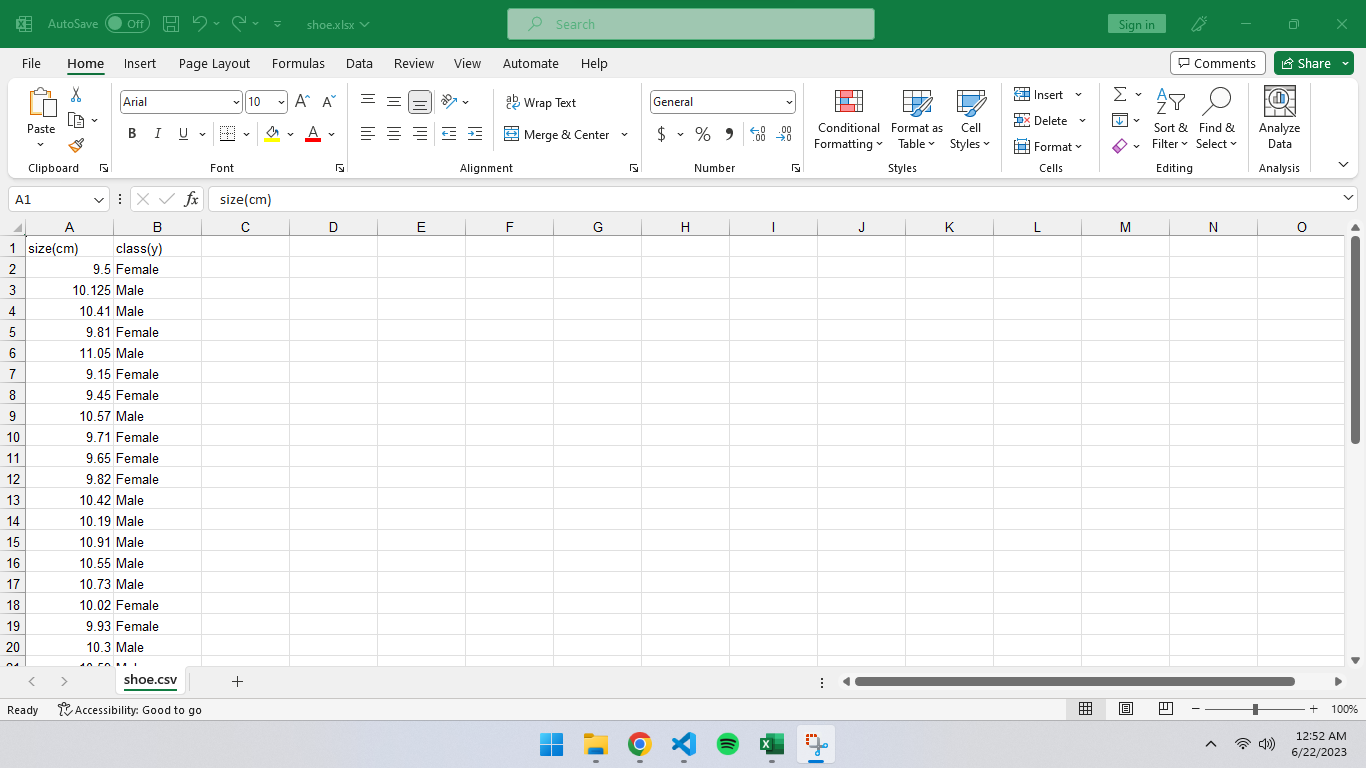

In [353]:
Image('data.png')

## Data Analysis

In [354]:
df = pd.read_excel('shoe.xlsx')

In [355]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [356]:
df.columns

Index(['size(cm)', 'class(y)'], dtype='object')

In [357]:
df.describe()

,size(cm)
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [359]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

In [360]:
df.shape

(40, 2)

In [361]:
df.corr(numeric_only = True)

,size(cm)
size(cm),1.0


In [362]:
df.dtypes

size(cm)    float64
class(y)     object
dtype: object

## Label Encoding

In [363]:
le = LabelEncoder()

In [364]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [365]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


## Training the Data Frame

In [366]:
xtrain, xtest, ytrain, ytest = tts(df[['size(cm)']], df[['class(y)']], test_size = 0.3, random_state = 39)

## Analyzing the Trained Data

In [367]:
xtrain.shape

(28, 1)

In [368]:
xtrain.head()

,size(cm)
19,10.59
22,9.20
8,9.71
7,10.57
27,10.81


In [369]:
ytrain.shape

(28, 1)

In [370]:
ytrain.head()

,class(y)
19,1
22,0
8,0
7,1
27,1


## Applying Decision Tree Algorithm and Training The Data

In [371]:
dt = tree.DecisionTreeClassifier()

In [372]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

### Predicted Result - Decision Tree

In [373]:
dt_pred = dt.predict(xtest)
dt_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

### Finding Accuracy, MSE (Mean Sqaured Error) & MAE (Mean Absolute Error) - Using Decision Tree Algorithm

In [374]:
dt_acc = accuracy_score(ytest, dt_pred)
dt_acc

0.9166666666666666

In [375]:
dt_mse = mean_squared_error(ytest, dt_pred)
dt_mse

0.08333333333333333

In [376]:
dt_mae = mean_absolute_error(ytest, dt_pred)
dt_mae

0.08333333333333333

## Applying KNN Classification and Training the Data

In [377]:
ne = KNeighborsClassifier(n_neighbors = 10)

In [378]:
ne.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

### Predicted Result - KNN Classification

In [379]:
ne_pred = ne.predict(xtest)
ne_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

### Finding Accuracy, MSE (Mean Sqaured Error) & MAE (Mean Absolute Error) - Using KNN Classification

In [380]:
ne_acc = accuracy_score(ytest, ne_pred)
ne_acc

0.9166666666666666

In [381]:
ne_mse = mean_squared_error(ytest, ne_pred)
ne_mse

0.08333333333333333

In [382]:
ne_mae = mean_absolute_error(ytest, ne_pred)
ne_mae

0.08333333333333333

## Applying Logistic Regression and Training the Data

In [383]:
log = LogisticRegression()

In [384]:
log.fit(xtrain, ytrain)

LogisticRegression()

### Predicted Result - Logistic Regression

In [385]:
log_pred = log.predict(xtest)
log_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

### Finding Accuracy, MSE (Mean Sqaured Error) & MAE (Mean Absolute Error) - Using Logistic Regression

In [386]:
log_acc = accuracy_score(ytest, log_pred)
log_acc

0.8333333333333334

In [387]:
log_mse = mean_squared_error(ytest, log_pred)
log_mse

0.16666666666666666

In [388]:
log_mae = mean_absolute_error(ytest, log_pred)
log_mae

0.16666666666666666

## Creating a Data Frame

In [389]:
data = pd.DataFrame({'Model': ['Decision Tree', 'KNN Classification', 'Logistic Regression'], 'Accuracy': [dt_acc, ne_acc, log_acc], 'Mean Squared Error': [dt_mse, ne_mse, log_mse], 'Mean Absolute Error': [dt_mae, ne_mae, log_mae]}, index = [1, 2, 3])
print(data)

                 Model  Accuracy  Mean Squared Error  Mean Absolute Error
1        Decision Tree  0.916667            0.083333             0.083333
2   KNN Classification  0.916667            0.083333             0.083333
3  Logistic Regression  0.833333            0.166667             0.166667


## Creating a Barplot

Text(0.5, 1.0, 'Accuracy Comparison')

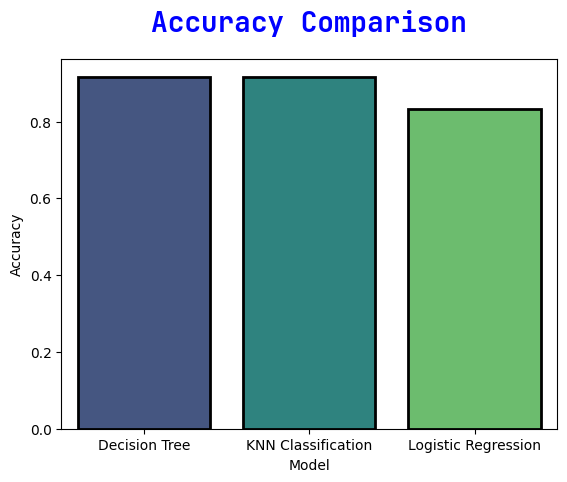

In [390]:
sns.barplot(x = 'Model', y = 'Accuracy', data = data, palette = 'viridis', edgecolor = 'black', linewidth = 2).set_title('Accuracy Comparison', fontsize = 20, pad = 20, fontname = 'JetBrains Mono', fontweight = 'bold', color = 'blue', loc = 'center')